<a href="https://colab.research.google.com/github/rines-nes/Machine-Learning-for-User-Classification-Project/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
raw_data=pd.read_csv('/content/ml_datasource.csv')
df=raw_data.copy()
df.head()


,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [5]:
df.columns

Index(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started', 'practice_exams_passed',
       'minutes_spent_on_exams', 'purchased'],
      dtype='object')

In [6]:
df.shape

(17761, 8)

<Axes: xlabel='days_on_platform', ylabel='Density'>

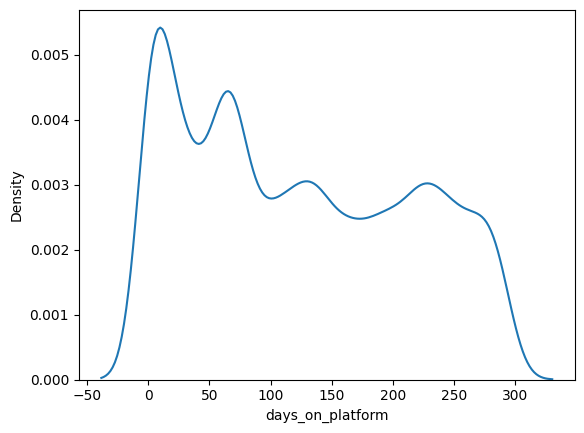

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_orig()
sns.kdeplot(df['days_on_platform'])

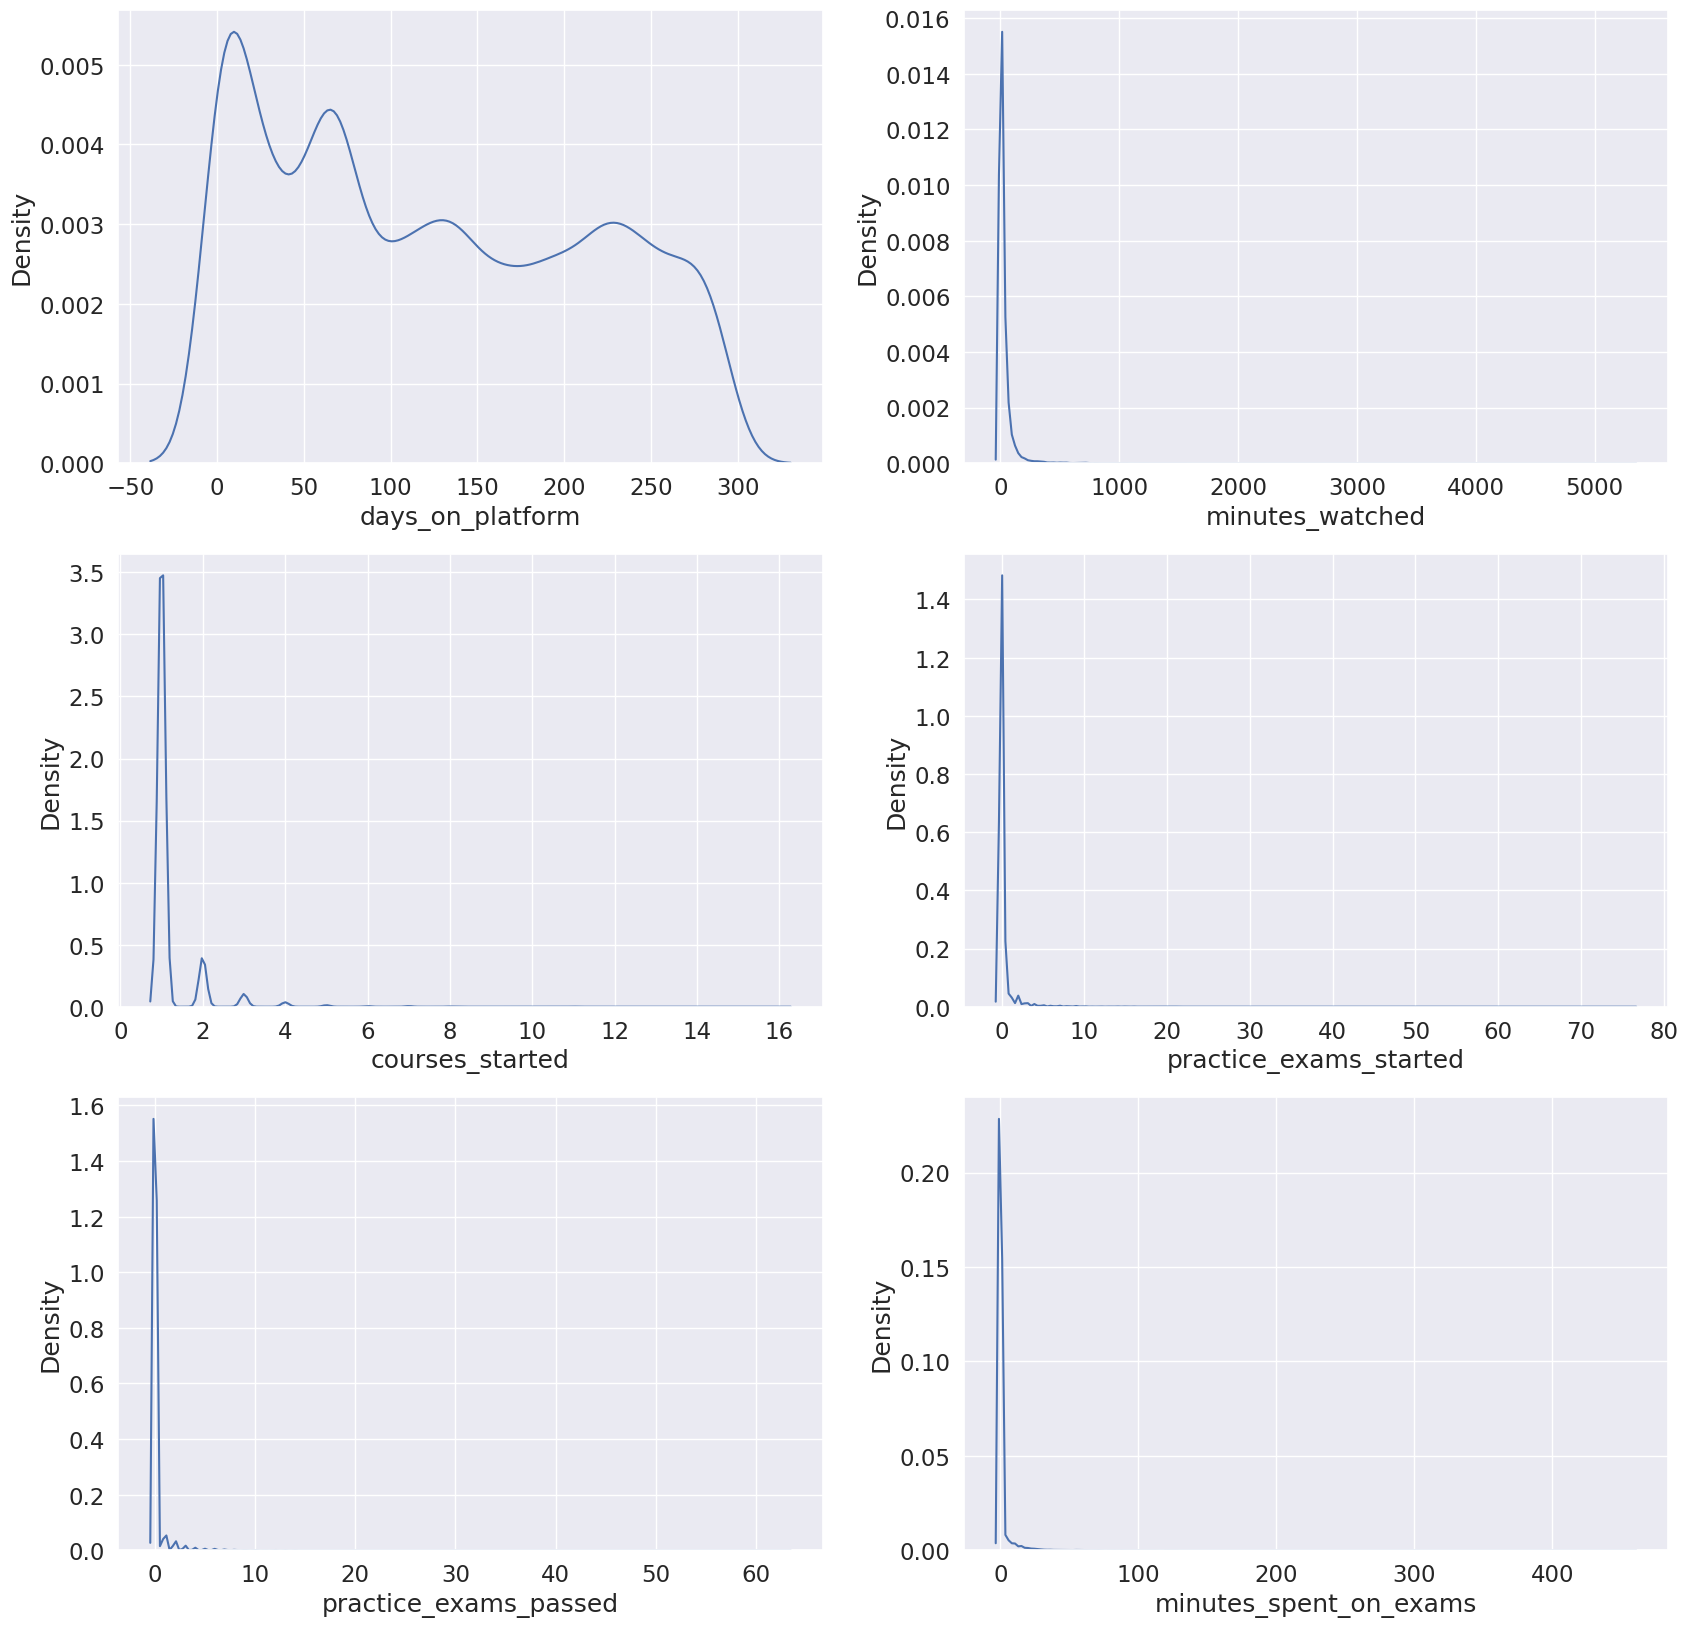

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axes grid first
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
sns.set(font_scale=1.5)

# Now, plot each kdeplot on the respective axes
sns.kdeplot(df['days_on_platform'], ax=axes[0, 0])
sns.kdeplot(df['minutes_watched'], ax=axes[0, 1])
sns.kdeplot(df['courses_started'], ax=axes[1, 0])
sns.kdeplot(df['practice_exams_started'], ax=axes[1, 1])
sns.kdeplot(df['practice_exams_passed'], ax=axes[2, 0])
sns.kdeplot(df['minutes_spent_on_exams'], ax=axes[2, 1])

# Display the plot
plt.show()

**we can see that these variables are highly skewed to the right only the variable days_on_platform which is converging to uniform distribution**

In [19]:
df.describe() # to compare the mean with max-min values

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000
mean,123.205112,31.082906,1.196442,0.277800,0.176341,1.242772,0.091830
std,90.675102,90.593660,0.646788,1.659998,1.099900,7.755386,0.288795
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,6.800000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,204.000000,34.300000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,5312.300000,16.000000,76.000000,63.000000,457.410000,1.000000


**75% of the 'minutes_watched' variable are under 34 min

*   75% of the 'courses_started' are under one course started

*   75% of the 'practice_exams_started' are under one**


  

In [21]:
data_no_outliers = df[(df['minutes_watched'] <= 1000)
                            & (df['courses_started']<=10)
                            & (df['practice_exams_started']<=10)
                            & (df['minutes_spent_on_exams']<=40)]

In [24]:
data_no_outliers.shape

(17626, 8)

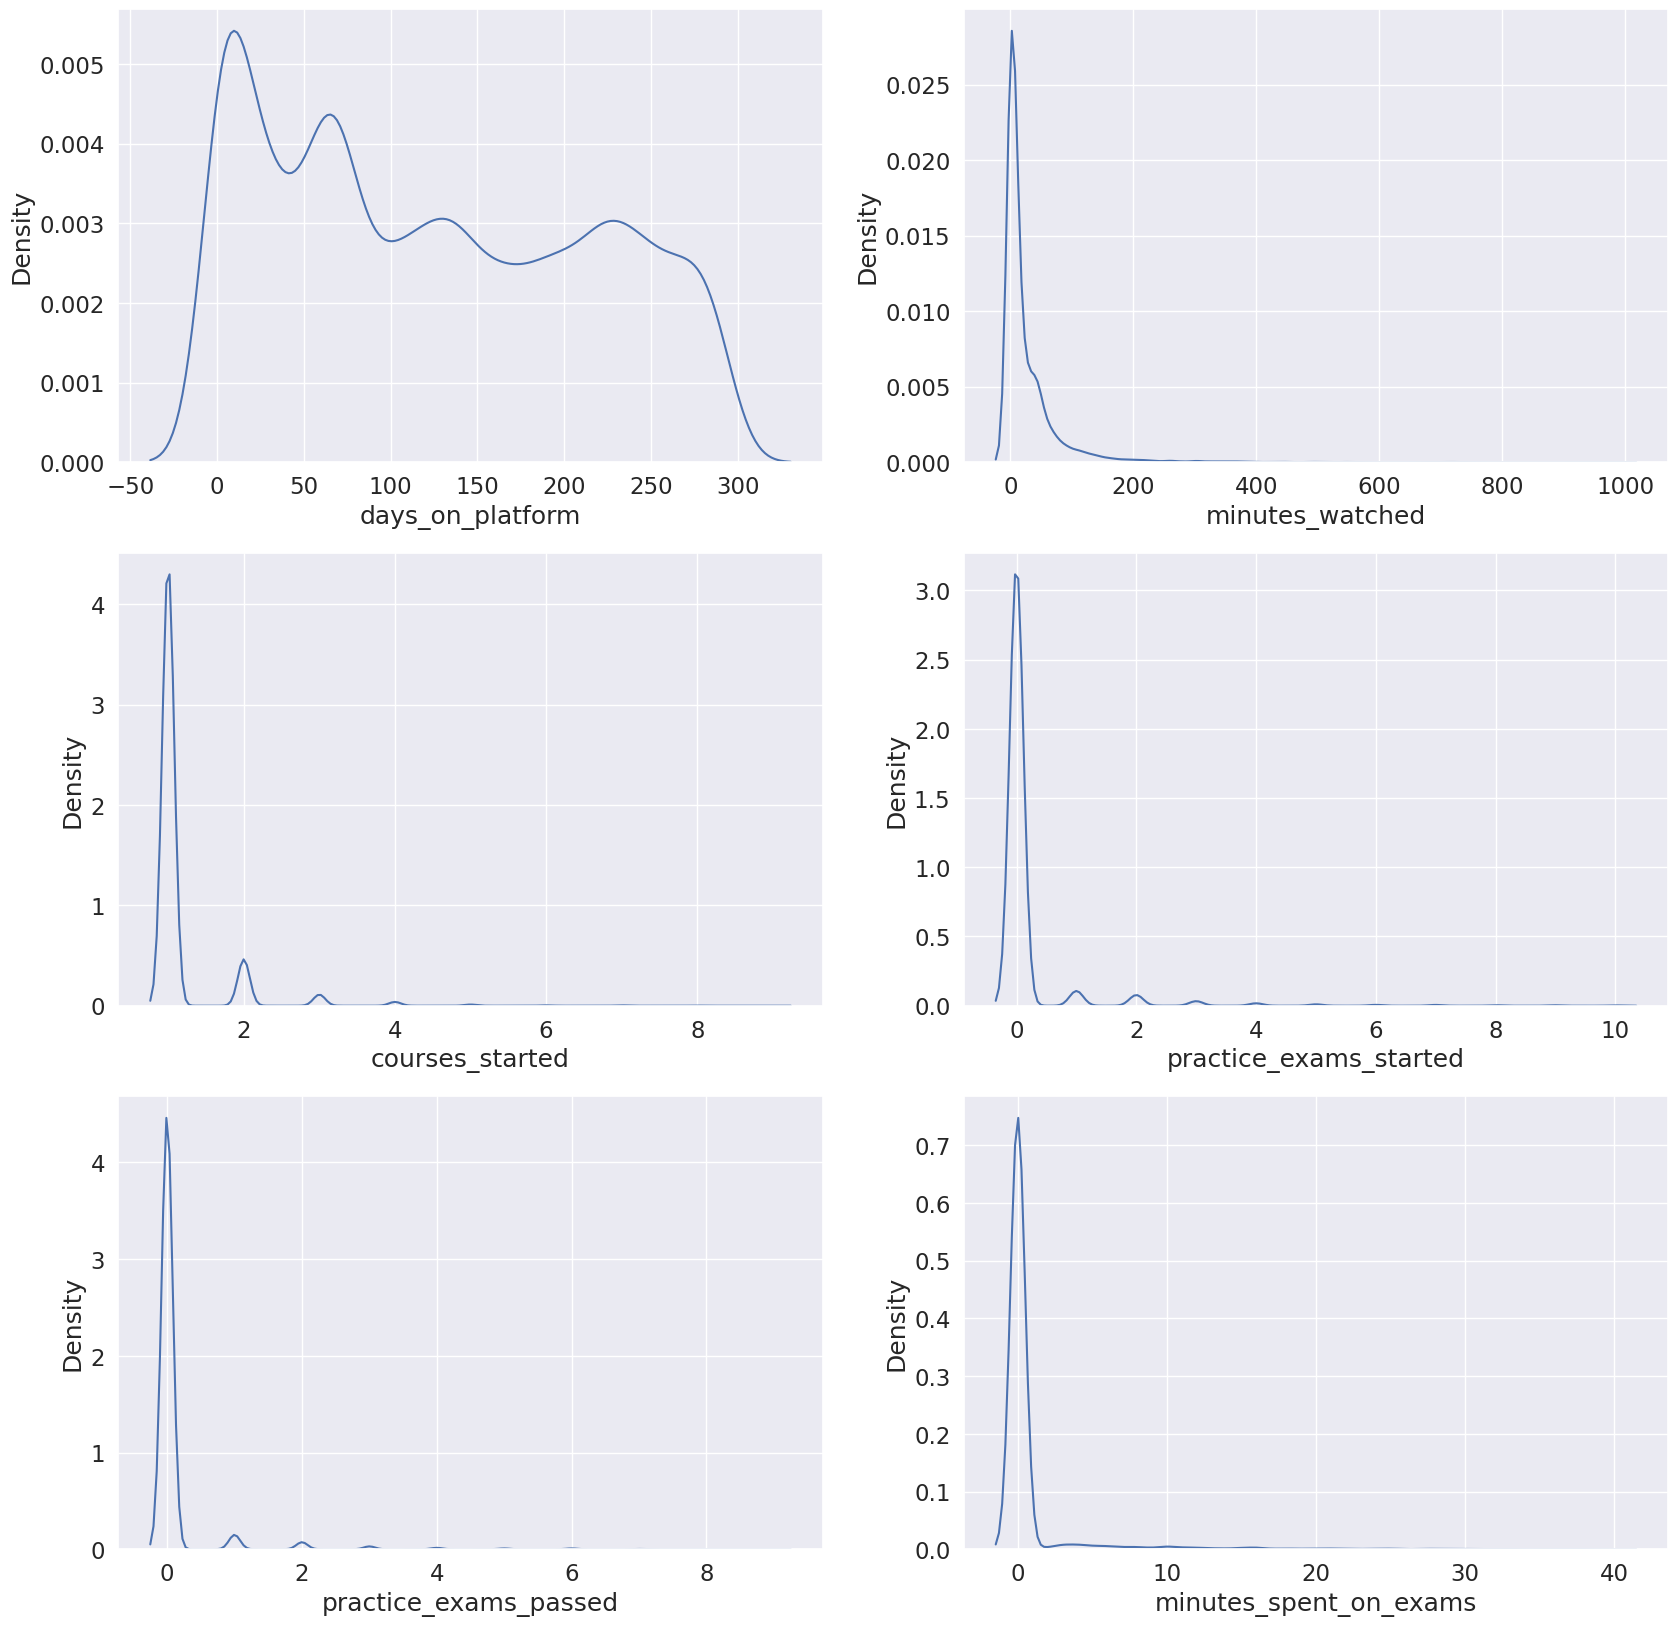

In [23]:
# Create the figure and axes grid first
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
sns.set(font_scale=1.5)

# Now, plot each kdeplot on the respective axes
sns.kdeplot(data_no_outliers['days_on_platform'], ax=axes[0, 0])
sns.kdeplot(data_no_outliers['minutes_watched'], ax=axes[0, 1])
sns.kdeplot(data_no_outliers['courses_started'], ax=axes[1, 0])
sns.kdeplot(data_no_outliers['practice_exams_started'], ax=axes[1, 1])
sns.kdeplot(data_no_outliers['practice_exams_passed'], ax=axes[2, 0])
sns.kdeplot(data_no_outliers['minutes_spent_on_exams'], ax=axes[2, 1])

# Display the plot
plt.show()

<Axes: >

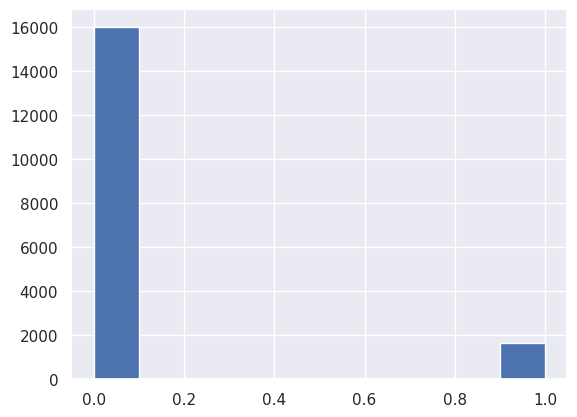

In [ ]:
df['purchased'].hist()

the classes are highly imbalanced

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_no_outliers.columns.to_numpy()


array(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started',
       'practice_exams_passed', 'minutes_spent_on_exams', 'purchased'],
      dtype=object)

In [27]:
predictor_vars = -data_no_outliers.drop(columns=['student_country', 'purchased'])
vif_data = pd.DataFrame()
vif_data["Feature"] = predictor_vars.columns
vif_data["VIF"] = [variance_inflation_factor(predictor_vars.to_numpy(), i) for i in range(predictor_vars.shape[1])]

print(vif_data)

                  Feature        VIF
0        days_on_platform   2.301237
1         minutes_watched   1.788777
2         courses_started   3.178713
3  practice_exams_started  10.201823
4   practice_exams_passed   7.812546
5  minutes_spent_on_exams   3.345478


**we remove numerical cols where VIF >5**

In [28]:
data_no_mult = data_no_outliers.drop('practice_exams_started', axis = 1)

In [29]:
data_no_mult.isnull().sum()

,0
student_country,8
days_on_platform,0
minutes_watched,0
courses_started,0
practice_exams_passed,0
minutes_spent_on_exams,0
purchased,0


In [31]:
data_no_nulls = data_no_mult.fillna('NAM', axis = 1)

In [32]:
data_no_nulls.loc[ data_no_nulls['student_country'] == 'NAM', 'student_country']

,student_country
311,NAM
337,NAM
556,NAM
806,NAM
1097,NAM
12363,NAM
12633,NAM
16946,NAM


**Splitting the Data**

In [33]:
y=data_no_nulls['purchased']
X=data_no_nulls.drop(columns=['purchased'])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365,stratify = y)

In [38]:
X_test.shape

(3526, 6)

In [39]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(handle_unknown = 'use_encoded_value',
                     unknown_value = 170)

In [40]:

X_train['student_country_enc'] = enc.fit_transform(X_train['student_country'].to_numpy().reshape(-1, 1))

# Apply transform to the test data based on the fitted encoder (this handles new/unknown values)
X_test['student_country_enc'] = enc.transform(X_test['student_country'].to_numpy().reshape(-1, 1))

In [41]:
X_train=X_train.drop(columns='student_country', axis = 1)
X_test=X_test.drop(columns='student_country', axis = 1)

In [42]:
class_mapping = dict(zip(enc.categories_[0], range(len(enc.categories_[0]))))
# Print the class to encoded value mapping
print("Class to Encoded Number Mapping:")
print(class_mapping)

Class to Encoded Number Mapping:
{'AE': 0, 'AG': 1, 'AL': 2, 'AM': 3, 'AO': 4, 'AR': 5, 'AT': 6, 'AU': 7, 'AW': 8, 'AZ': 9, 'BA': 10, 'BB': 11, 'BD': 12, 'BE': 13, 'BF': 14, 'BG': 15, 'BH': 16, 'BI': 17, 'BJ': 18, 'BM': 19, 'BO': 20, 'BR': 21, 'BS': 22, 'BT': 23, 'BW': 24, 'BY': 25, 'BZ': 26, 'CA': 27, 'CD': 28, 'CG': 29, 'CH': 30, 'CI': 31, 'CL': 32, 'CM': 33, 'CN': 34, 'CO': 35, 'CR': 36, 'CY': 37, 'CZ': 38, 'DE': 39, 'DJ': 40, 'DK': 41, 'DO': 42, 'DZ': 43, 'EC': 44, 'EE': 45, 'EG': 46, 'ES': 47, 'ET': 48, 'FI': 49, 'FJ': 50, 'FR': 51, 'GA': 52, 'GB': 53, 'GD': 54, 'GE': 55, 'GH': 56, 'GM': 57, 'GN': 58, 'GR': 59, 'GT': 60, 'HK': 61, 'HN': 62, 'HR': 63, 'HT': 64, 'HU': 65, 'ID': 66, 'IE': 67, 'IL': 68, 'IN': 69, 'IQ': 70, 'IS': 71, 'IT': 72, 'JM': 73, 'JO': 74, 'JP': 75, 'KE': 76, 'KG': 77, 'KH': 78, 'KM': 79, 'KR': 80, 'KW': 81, 'KZ': 82, 'LB': 83, 'LK': 84, 'LR': 85, 'LS': 86, 'LT': 87, 'LU': 88, 'LV': 89, 'LY': 90, 'MA': 91, 'MD': 92, 'ME': 93, 'MG': 94, 'MK': 95, 'ML': 96, 'MM': 

In [43]:
import numpy as np
x_train_array = np.asarray(X_train, dtype='float')
y_train_array = np.asarray(y_train, dtype='int')

# Convert the testing data (X_test) and target labels (y_test) into NumPy arrays
x_test_array = np.asarray(X_test, dtype='float')
y_test_array = np.asarray(y_test, dtype='int')

**LOGISTIC REGRESSION**

In [44]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train_array,x_train_array)
log_reg_results=log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.153146
         Iterations 10


In [45]:
print(log_reg_results.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14094
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.5019
Time:                        21:47:34   Log-Likelihood:                -2159.4
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0691      0.002    -31.914      0.000      -0.073      -0.065
x2             0.0144      0.001     19.992      0.000       0.013       0.016
x3            -0.2885      0.060     -4.784      0.0

In [46]:
predicted_probabilities = log_reg_results.predict(x_test_array)

In [47]:
predicted_classes = predicted_probabilities.round()
print("Actual values:", list(y_test_array))
print("Predictions:", list(predicted_classes))

Actual values: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 

Accuracy: 95.66%
Confusion Matrix:
 [[3157   44]
 [ 109  216]]


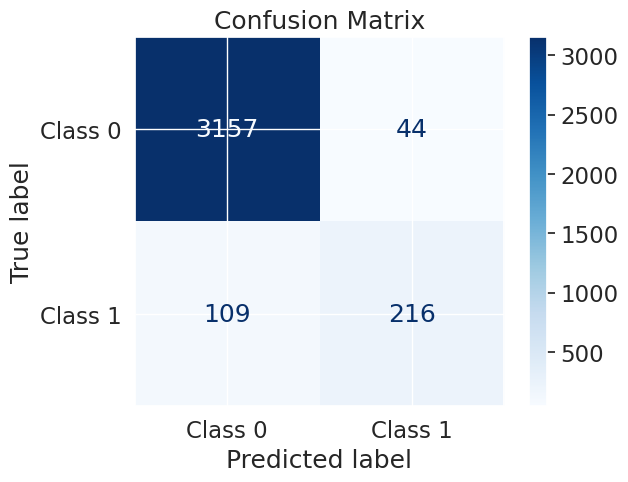

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Optionally, calculate model evaluation metrics like accuracy, confusion matrix, etc.
accuracy = accuracy_score(y_test_array, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_array, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Class 0", "Class 1"])
disp.plot(cmap='Blues')  # You can change the colormap as desired

# Show the confusion matrix plot
plt.title("Confusion Matrix")
plt.show()

**K-nearest-neighbors :**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Define the range of parameters for KNN
parameters_knn = {
    'n_neighbors': range(1, 51),  # Testing values from 1 to 50 for n_neighbors
    'weights': ['uniform', 'distance']  # Testing 'uniform' and 'distance' for weights
}

# Print the parameter grid to check
print(parameters_knn)

{'n_neighbors': range(1, 51), 'weights': ['uniform', 'distance']}


In [50]:
knn = KNeighborsClassifier()

# Create an instance of GridSearchCV with the KNN model, parameter grid, and evaluation metric
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=parameters_knn,
                               scoring='accuracy',  # Use accuracy as the scoring metric
                               cv=5,                 # 5-fold cross-validation
                               n_jobs=-1,            # Use all available cores
                               verbose=1)            # Print progress messages

grid_search_knn.fit(x_train_array, y_train_array)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [51]:
print("Best parameters found: ", grid_search_knn.best_params_)
print("Best score found: ", grid_search_knn.best_score_)

Best parameters found:  {'n_neighbors': 10, 'weights': 'distance'}
Best score found:  0.9598581560283688


In [52]:
knn_clf = grid_search_knn.best_estimator_
knn_clf

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [53]:
y_test_pred_knn = knn_clf.predict(x_test_array)

# Print the predictions
print(y_test_pred_knn)

[0 0 0 ... 0 1 0]


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.79      0.71      0.75       325

    accuracy                           0.96      3526
   macro avg       0.88      0.85      0.86      3526
weighted avg       0.95      0.96      0.95      3526



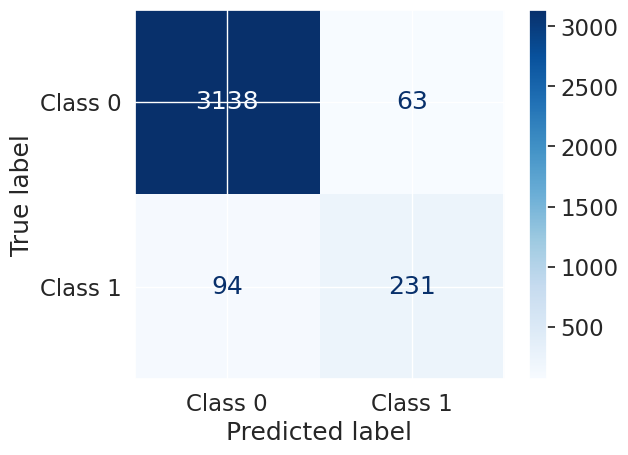

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test_array, y_test_pred_knn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])  # Adjust labels as needed
disp.plot(cmap='Blues')

# Optionally, print the classification report for detailed metrics (precision, recall, f1-score)
print(classification_report(y_test_array, y_test_pred_knn))

**SUPPORT VECTOR MACHINE SVM**

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.81      0.69      0.74       325

    accuracy                           0.96      3526
   macro avg       0.89      0.83      0.86      3526
weighted avg       0.95      0.96      0.95      3526



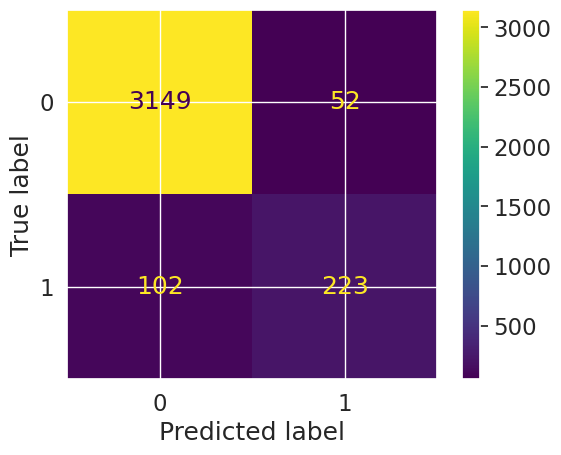


Best parameters found by GridSearchCV:
{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


In [57]:
parameters_svm = {
    'C': [0.1, 1, 10],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient for rbf, poly, and sigmoid
}

# Step 3: Create an SVM model
svm = SVC()

# Step 4: Set up GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=parameters_svm, cv=5, scoring='accuracy')

# Step 5: Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train_scaled, y_train_array)

# Step 6: Get the best estimator from the grid search
svm_best_model = grid_search_svm.best_estimator_

y_test_pred_svm = svm_best_model.predict(X_test_scaled)

# Step 8: Display classification report
print("Classification Report for SVM:")
print(classification_report(y_test_array, y_test_pred_svm))

# Step 9: Display confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_best_model, X_test_scaled, y_test_array)
plt.show()

# Step 10: Display the best parameters found by grid search
print("\nBest parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)

**DECISION TREE**

In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 2: Define the parameter grid for Decision Tree tuning (only ccp_alpha)
parameters_dt = {
    'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]  # Testing various pruning values
}

# Step 3: Create the Decision Tree model
dt = DecisionTreeClassifier(random_state=365)

# Step 4: Set up the GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=parameters_dt, cv=5, scoring='accuracy')

# Step 5: Fit the GridSearchCV to the training data (non-scaled)
grid_search_dt.fit(X_train, y_train_array)
# Step 6: Get the best estimator from the grid search
dt_best_model = grid_search_dt.best_estimator_

# Step 7: Make predictions on the test data
y_test_pred_dt = dt_best_model.predict(X_test)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3201
           1       0.81      0.76      0.78       325

    accuracy                           0.96      3526
   macro avg       0.90      0.87      0.88      3526
weighted avg       0.96      0.96      0.96      3526



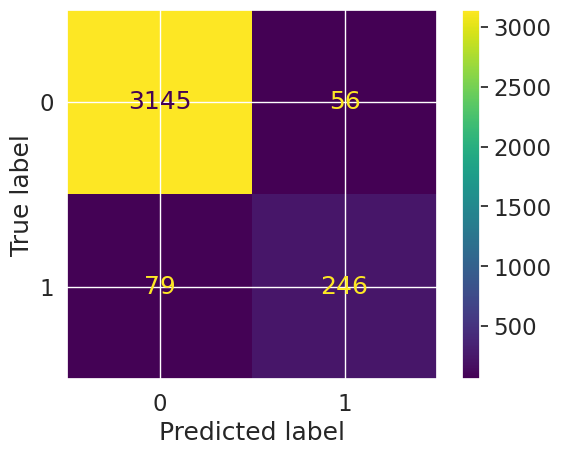


Best parameters found by GridSearchCV:
{'ccp_alpha': 0.001}


In [61]:

print("Classification Report for Decision Tree:")
print(classification_report(y_test_array, y_test_pred_dt))

# Step 9: Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_best_model, X_test, y_test_array)
plt.show()

# Step 10: Display the best parameters found by grid search
print("\nBest parameters found by GridSearchCV:")
print(grid_search_dt.best_params_)

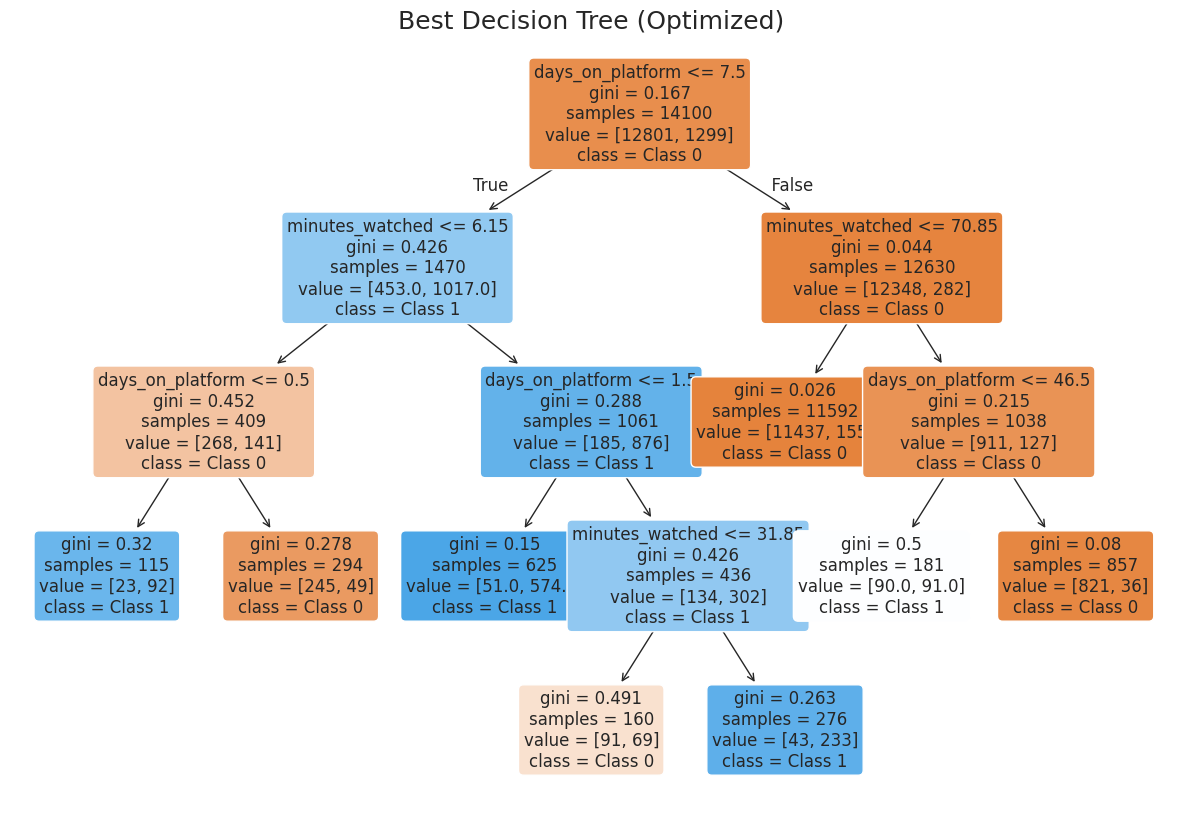

In [62]:
plt.figure(figsize=(15, 10))  # Set the figure size for better visualization
plot_tree(
    dt_best_model,
    filled=True,
    feature_names=X_train.columns,  # Feature names used during training
    class_names=['Class 0', 'Class 1'],  # Class labels
    rounded=True,  # Make the corners of the boxes rounded for aesthetic purposes
    fontsize=12  # Adjust the font size for readability
)
plt.title("Best Decision Tree (Optimized)")
plt.show()

** RANDOM FOREST**

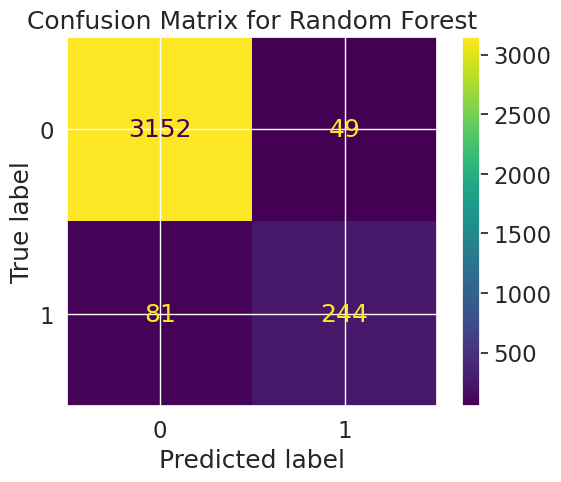

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.83      0.75      0.79       325

    accuracy                           0.96      3526
   macro avg       0.90      0.87      0.88      3526
weighted avg       0.96      0.96      0.96      3526



In [63]:
# Step 1: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 2: Retrieve the best ccp_alpha value from the Decision Tree model
best_ccp_alpha = grid_search_dt.best_params_['ccp_alpha']

# Step 3: Create the Random Forest model with the best ccp_alpha value
rf_model = RandomForestClassifier(random_state=365, ccp_alpha=best_ccp_alpha)

# Step 4: Fit the Random Forest model on the training data
rf_model.fit(X_train, y_train_array)

# Step 5: Make predictions on the test data
y_test_pred_rf = rf_model.predict(X_test)

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test_array)
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Step 7: Display the classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test_array, y_test_pred_rf))